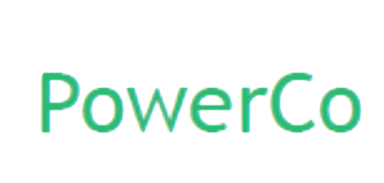


# Task Information

The BCG project team thinks that building a churn model to understand whether price sensitivity is the largest driver of churn has potential. The client has sent over some data and the AD requires some exploratory data analysis to be performed.

The data that was sent over includes:

* Historical customer data: Customer data such as usage, sign up date, forecasted usage etc
* Historical pricing data: variable and fixed pricing data etc
* Churn indicator: whether each customer has churned or not

<div class="alert alert-block alert-info">

**Sub-Task 1:**

Perform some exploratory data analysis. Look into the data types, data statistics, specific parameters, and variable distributions. This first subtask is for you to gain a holistic understanding of the dataset. 

**Sub-Task 2:**

Verify the hypothesis of price sensitivity being to some extent correlated with churn. It is up to you to define price sensitivity and calculate it. 


**Sub-Task 3:**

Prepare a half-page summary or slide of key findings and add some suggestions for data augmentation – which other sources of data should the client provide you with and which open source datasets might be useful?
    
</div>

**Sub-Task 1**

In [1]:
# Import the required Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Upload the data files into a dataframe 

# Upload client data and view the top 5 rows and last 5 rows
df_1 = pd.read_csv('Resources and Task Information/client_data.csv')

# Analysis on a copy of the original dataset
client_data_df = df_1.copy()

In [4]:
# Upload price data and view the top 5 rows and last 5 rows
df_2 = pd.read_csv('Resources and Task Information/price_data.csv')

# Analysis on a copy of the original dataset
price_data_df = df_2.copy()

<div class="alert alert-block alert-info">
We will proceed by exploring the client data first. 
    
 <div>

In [5]:
# Get the deneral information on the client dataset
client_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         


<div class="alert alert-block alert-info">
It will be good to review the data dictionary to confirm that we have the ideal data type for each data variable.

At first glance there seems to be no missing values as well. This will be confirmed. 
<div>
    



**Below is the data dictionary:**

* id = client company identifier
* activity_new = category of the company’s activity
* channel_sales = code of the sales channel
* cons_12m = electricity consumption of the past 12 months
* cons_gas_12m = gas consumption of the past 12 months
* cons_last_month = electricity consumption of the last month
* date_activ = date of activation of the contract
* date_end = registered date of the end of the contract
* date_modif_prod = date of the last modification of the product
* date_renewal = date of the next contract renewal
* forecast_cons_12m = forecasted electricity consumption for next 12 months
* forecast_cons_year = forecasted electricity consumption for the next calendar year
* forecast_discount_energy = forecasted value of current discount
* forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
* forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
* forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
* forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)
* has_gas = indicated if client is also a gas client
* imp_cons = current paid consumption
* margin_gross_pow_ele = gross margin on power subscription
* margin_net_pow_ele = net margin on power subscription
* nb_prod_act = number of active products and services
* net_margin = total net margin
* num_years_antig = antiquity of the client (in number of years)
* origin_up = code of the electricity campaign the customer first subscribed to
* pow_max = subscribed power
* churn = has the client churned over the next 3 months


In [6]:
# Confirm the column names of the client data set 
client_data_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [7]:
# Confirm there are no missing data
client_data_df.isna().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

<div class="alert alert-block alert-info">
It is confirmed there are no missing data.

However, the date variables have a `object` data type instead of a `datetime` data type
    
Also, there is need to be consistent with the similar data points e.g. cons_12m is `int64` while forecast_cons_12m is `float`
 
 <div>

In [8]:
# Change the data type from object to datetime
client_data_df['date_activ']=pd.to_datetime(client_data_df['date_activ'])#, format='%Y')
client_data_df['date_end']=pd.to_datetime(client_data_df['date_activ'])#, format='%Y')
client_data_df['date_modif_prod']=pd.to_datetime(client_data_df['date_activ'])#, format='%Y')
client_data_df['date_renewal']=pd.to_datetime(client_data_df['date_activ'])#, format='%Y')

# Change the data type of selected variables from `int64` to `float`
client_data_df['cons_12m'] = client_data_df['cons_12m'].astype(float)
client_data_df['cons_gas_12m'] = client_data_df['cons_12m'].astype(float)
client_data_df['cons_last_month'] = client_data_df['cons_12m'].astype(float)
client_data_df['forecast_cons_year'] = client_data_df['cons_12m'].astype(float)

In [9]:
# Confirm the change was effected|
client_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  float64       
 3   cons_gas_12m                    14606 non-null  float64       
 4   cons_last_month                 14606 non-null  float64       
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  float64       
 11  fo

In [17]:
# We would check the descriptive statistics for the numeric values

# Keep the output at 2 decimal place
pd.set_option('display.float_format', lambda x: '%.2f' % x)

client_data_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00
mean,159220.29,159220.29,159220.29,1868.61,159220.29,0.97,63.09,0.14,0.05,43.13,152.79,24.57,24.56,1.29,189.26,5.00,18.14,0.10
std,573465.26,573465.26,573465.26,2387.57,573465.26,5.11,66.17,0.02,0.05,4.49,341.37,20.23,20.23,0.71,311.80,1.61,13.53,0.30
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,3.30,0.00
25%,5674.75,5674.75,5674.75,495.00,5674.75,0.00,16.18,0.12,0.00,40.61,0.00,14.28,14.28,1.00,50.71,4.00,12.50,0.00
50%,14115.50,14115.50,14115.50,1112.88,14115.50,0.00,18.80,0.14,0.08,44.31,37.39,21.64,21.64,1.00,112.53,5.00,13.86,0.00
75%,40763.75,40763.75,40763.75,2401.79,40763.75,0.00,131.03,0.15,0.10,44.31,193.98,29.88,29.88,1.00,243.10,6.00,19.17,0.00
max,6207104.00,6207104.00,6207104.00,82902.83,6207104.00,30.00,599.31,0.27,0.20,59.27,15042.79,374.64,374.64,32.00,24570.65,13.00,320.00,1.00


> There is a constant figure for the descriptive statistics for last 12 months and last month consumption of electricity and gas which is unexpected. This will be investigated using graphical EDA

> We will now explore the categorical data. Note that `churn` is categorical even though is numeric. This will be the label for training the churn predictor at the later part of this project.

> The sales channels through which the customer was signed up and the customers which are also gas customers will be explored.

In [23]:
# Count of clients per sales channels
client_data_df.groupby('channel_sales')['id'].count().sort_values(ascending=False)

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: id, dtype: int64

In [74]:
# A simpler way to get same value above.
client_data_df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [22]:
# number of sales channels 
len(client_data_df.groupby('channel_sales')['id'].count())

8

In [45]:
# Create a DataFrame of the customers that churned
client_data_churned = client_data_df[client_data_df['churn'] == 1].copy()

# Create a DataFrame of the customers that did not churn
client_data_not_churned = client_data_df[client_data_df['churn'] == 0].copy()


In [42]:
# Number and percentage of customers that churned
len(client_data_churned), f"{len(client_data_churned)/len(client_data_df):.0%}"

(1419, '10%')

In [43]:
# Number and percentage of customers that did not churn
len(client_data_not_churned), f"{len(client_data_not_churned)/len(client_data_df):.0%}"

(13187, '90%')

In [70]:
# Explore the `has_gas` column to find out its distinct classifiers and thier count
client_data_df['has_gas'].value_counts()

f    11955
t     2651
Name: has_gas, dtype: int64

In [71]:
# Create DataFrame of customers that are also gas customers
client_data_gas = client_data_df[client_data_df['has_gas'] == 't'].copy()

In [72]:
# Create DataFrame of customers that are not gas customers
client_data_no_gas = client_data_df[client_data_df['has_gas'] == 'f'].copy()

In [73]:
# Explore the electricity campaign customers first subscribed to 
client_data_df['origin_up'].value_counts() 

lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

<div class="alert alert-block alert-info">

**Graphical Exploratory Data Analysis**

We would now carry out a graphical EDA on the client dataset to explore the following:

  * Outliers - boxplots of each variable
  * Univariate analysis - histogram distribution of each variable
  * Multivariate analysis - correlations, scatter diagrams 
    
 <div>

In [88]:
#plt.boxplot(client_data_df)

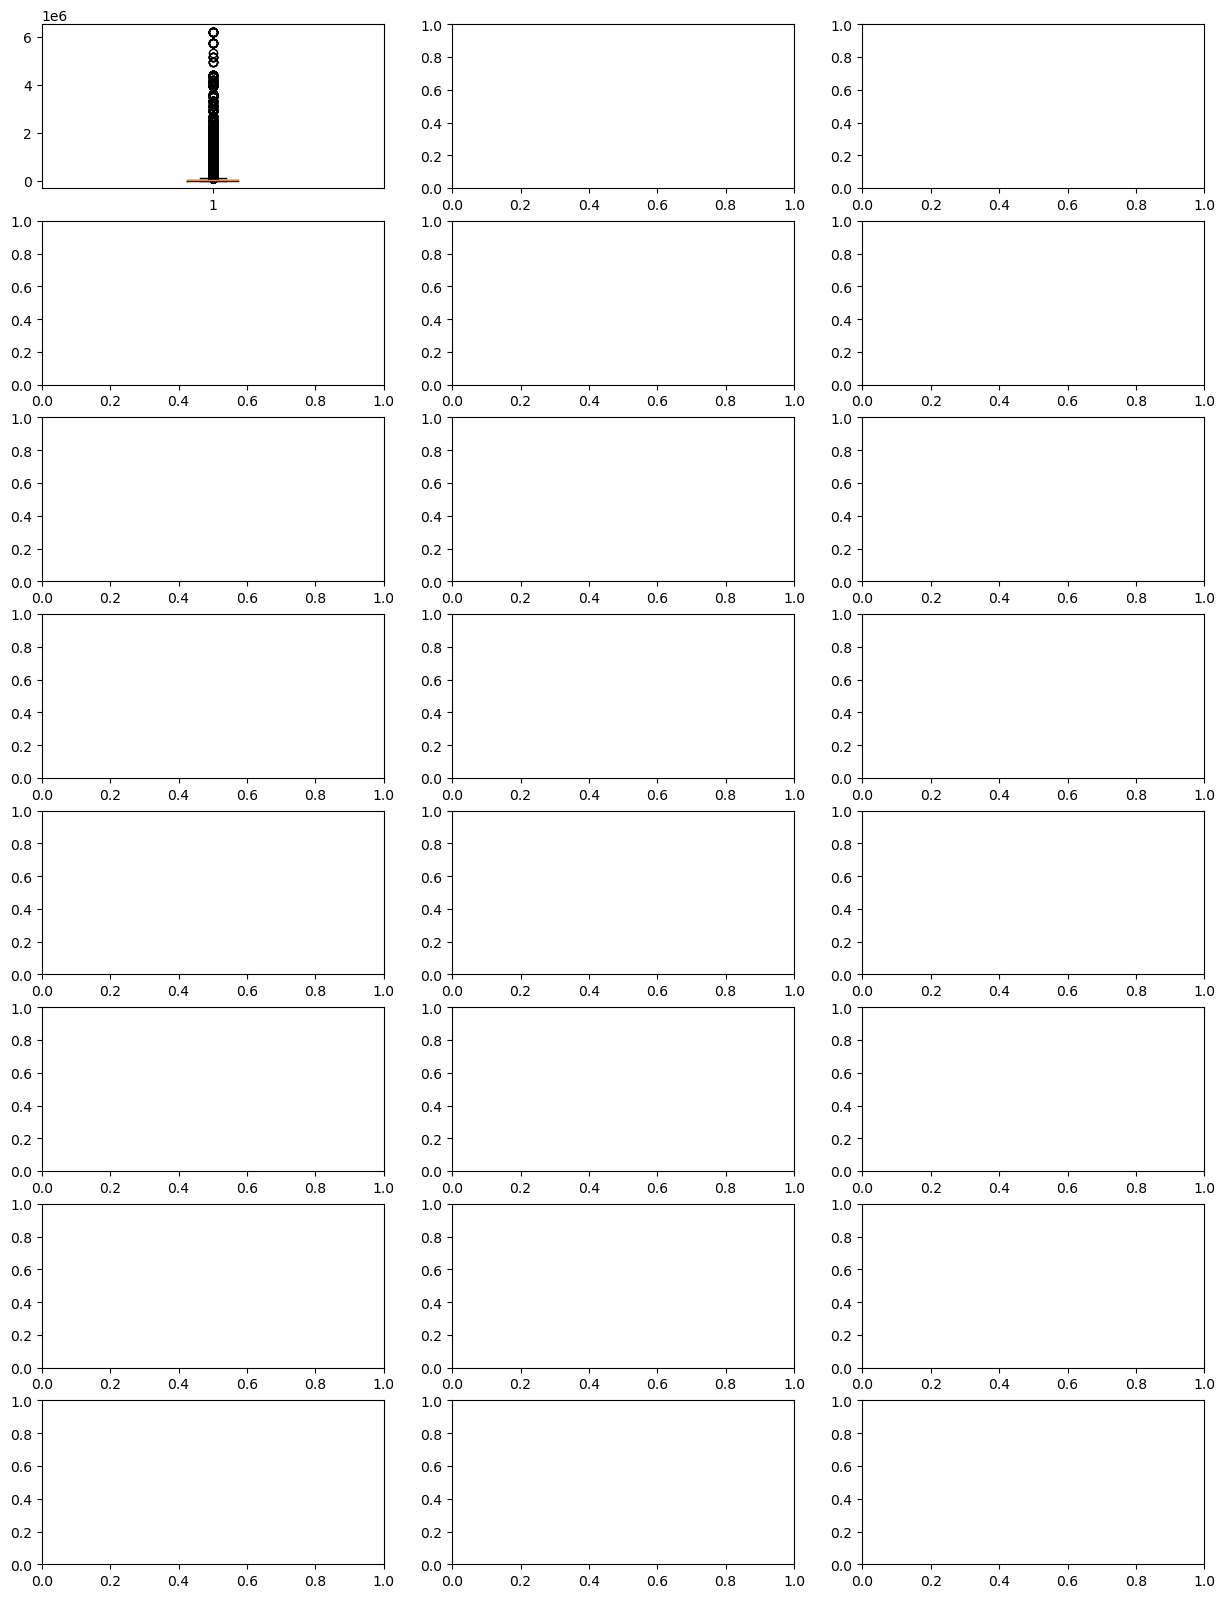

In [107]:
# Plot a boxplot of all the numeric variables in a grid
fig, axs = plt.subplots(8,3, figsize=(15,20))

axs[0, 0].boxplot(client_data_df['cons_12m']);

# for count,col in enumerate(client_data_df.columns):
#     if client_data_df[col].dtype == 'float':
#         axs[count] = plt.boxplot(client_data_df[col])
    